## Mempersipakan data dan library yang digunakan

In [ ]:
# import library yang diperlukan
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
directory = os.path.join('sample_data', 'california_housing_train.csv')

# melihat file directori ada/tidak
if os.path.isfile(directory):
  print('File ditemukan') 

File ditemukan


## Exploratory Data Analysis

In [ ]:
# melihat isi bagian awal dari dataset
dataset = pd.read_csv(directory)
dataset.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
# melihat informasi dari data set
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [ ]:
# melihat informasi statik deskriptif dataset
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Feature Engineering

In [ ]:
# membagi data feature dan label
feature = dataset.drop(['median_house_value'], axis=1)
label = dataset['median_house_value']

In [ ]:
# melakukan scalling pada feature dan label
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

feature_scaled = scaler.fit_transform(feature.values)
label_scaled = scaler.fit_transform(label.values.reshape(-1,1)).flatten()

In [ ]:
# memisahkan data training 80% dan testing 20%
from sklearn.model_selection import train_test_split
feature_train, feature_test, label_train, label_test = train_test_split(feature_scaled, label_scaled, test_size=0.2, random_state=10)

## Melatih Model

In [ ]:
# melatih dataset dengan algoritma xgboost
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 1, eta=0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 2000)

xg_reg.fit(feature_train, label_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.3, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=2000,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

## Evaluasi Model

In [ ]:
# melihat hasil nilai r2_score dari dara train dan test set
from sklearn.metrics import r2_score, mean_squared_error

r2_train = r2_score(xg_reg.predict(feature_train), label_train)
r2_test = r2_score(xg_reg.predict(feature_test), label_test)

print('Nilai r2 score data training \t: ', round(r2_train, 2))
print('Nilai r2 score data testing \t: ', round(r2_test, 2))

Nilai r2 score data training 	:  0.99
Nilai r2 score data testing 	:  0.82


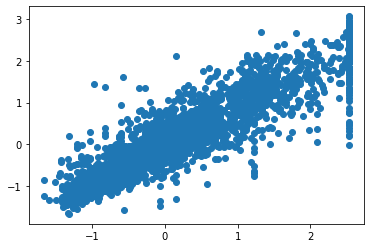

In [ ]:
predictions = xg_reg.predict(feature_test)
plt.scatter(label_test, predictions)
plt.show()